<a href="https://colab.research.google.com/github/Anushakirgeri/Python-programming/blob/Anushakirgeri-patch-1/Movie_Analytics_Tool_Anusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Welcome to the Movie Analysis tool!
Average IMDb review polarity:  0.5647584504835066
Average IMDb review subjectivity:  0.20702838144234847


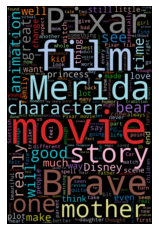

Would you like to run another analysis : (yes/no)?nooo
Thank you for choosing Movie Analytics tool!, See you again.


In [ ]:
#Movie analytics tool to allow users to search for a movie and provide requested analysis.

!pip install xmltodict

import requests, json, xmltodict, nltk, textblob, matplotlib.pyplot as plt, skimage.io, wordcloud
#Obtain omdb data from xml to dict form.
nltk.download("punkt")
print("Welcome to the Movie Analysis tool!")
repeatanalysis_fix = "yes"

#run the conditions until repeatanalysis_fix == "yes"
while(repeatanalysis_fix ==  "yes"):
  movie=input("Which movie would you like to analyze?")
  baseurl = "https://www.omdbapi.com/?r=xml&apikey=aa9705ce&t="
  full_url = baseurl + movie
  response = requests.get(full_url)

  if response:
    data = xmltodict.parse(response.text)
    choiceOf_analysis = textblob.TextBlob(input("Which type of analysis would you like to run : (background/reception/poster/wordcloud/sentiment)?"))
    spellcheck_ChoiceOf_analysis = choiceOf_analysis.correct().lower()
   #print(spellcheck_ChoiceOf_analysis)

   #Options to select for analysis, print the analysis accordingly
    if spellcheck_ChoiceOf_analysis == "background":
      title = data["root"]["movie"]["@title"]
      year = data["root"]["movie"]["@year"]
      rating = data["root"]["movie"]["@rated"]
      runtime = data["root"]["movie"]["@runtime"]
      genre = data["root"]["movie"]["@genre"]
      actors = data["root"]["movie"]["@actors"]
      plot = data["root"]["movie"]["@plot"]
     
      print("Title   : ", title)
      print("Year    : ", year)
      print("Rating  : ", rating)
      print("Runtime : ", runtime)
      print("Genre   : ", genre)
      print("Actors  : ", actors)
      print("Plot    : ", plot)

    elif spellcheck_ChoiceOf_analysis == "reception":
     title = data["root"]["movie"]["@title"]
     Awards = data["root"]["movie"]["@awards"]
     Metascore = data["root"]["movie"]["@metascore"]
     IMDb_rating = data["root"]["movie"]["@imdbRating"]
     
     print("Title       : ", title)
     print("Awards      : ", Awards)
     print("Metascore   : ", Metascore)
     print("IMDb Rating : ", IMDb_rating)

    elif spellcheck_ChoiceOf_analysis == "poster":
     poster_url = data["root"]["movie"]["@poster"]
     image = skimage.io.imread(poster_url)
     plt.imshow(image, interpolation = "bilinear")
     plt.axis("off")
     plt.show()

    elif spellcheck_ChoiceOf_analysis == "wordcloud":
     base_url = "https://dgoldberg.sdsu.edu/515/imdb/"
     full_url = base_url+movie+".json"
     #print(full_url)
     response = requests.get(full_url)

     if response:
      data = json.loads(response.text)
      text = ""

      #creating a single block of text to utilize in textblob
      for line in data:
          review_text = line["Review text"]
          text = text + review_text + " "   
          
      cloud = wordcloud.WordCloud(width = 1000, height =1500, background_color = "black", colormap = "tab20_r" )
      cloud.generate(str(text))
      #Save the wordcloud file
      cloud.to_file("movie_wordCloud.png")

      plt.imshow(cloud, interpolation = "bilinear")
      plt.axis("off")
      plt.show()
     else:
      print("We apologize, but the tool was unable to load any IMDb reviews for this film. Try try a different movie or analysis.")

    #Sentiment analysis of the Reviews
    elif spellcheck_ChoiceOf_analysis=="sentiment":
        base_url="https://dgoldberg.sdsu.edu/515/imdb/"
        full_url=base_url+movie+".json"
        response = requests.get(full_url)
        if response:
          data = json.loads(response.text)
          #creating list to append values
          polarity = []
          subjectivity = []

          for review in data:
            blob_text = textblob.TextBlob(review["Review text"])
            polarity_score = blob_text.polarity
            polarity.append(polarity_score)

            subjectivity_score = blob_text.subjectivity
            subjectivity.append(subjectivity_score)
            
            #calculating the average subjectivity
            avg_subjectivity = sum(subjectivity) / len(subjectivity) 
            #calculating the average polarity
            avg_polarity = sum(polarity) / len(polarity)
          #print the average polarity and subjectivity of the reviews
          print("Average IMDb review polarity: ", avg_subjectivity)
          print("Average IMDb review subjectivity: ", avg_polarity)

        else:
          print("Sorry, the tool could not successfully load any IMDb reviews for this movie. Please try another analysis or movie.")

    else:
     print("We do not have matching analysis for your input!") 
  else:
    print("Sorry!Connection Error.")

  repeatanalysis= textblob.TextBlob(input("Would you like to run another analysis : (yes/no)?"))
  repeatanalysis_fix = repeatanalysis.correct().lower()

print("Thank you for choosing Movie Analytics tool!, See you again.")